In [1]:
import pandas as pd
import numpy as np
# Load the uploaded cleaned dataset
file_path = "C:/Users/kamali patel/Documents/cleaned_standardized_heart_data.csv"
heart_data = pd.read_csv(file_path)

# Display the structure of the dataset to confirm loading
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      445132 non-null  object 
 1   generalhealth              445132 non-null  int64  
 2   physicalhealthdays         434205 non-null  float64
 3   mentalhealthdays           436065 non-null  float64
 4   lastcheckuptime            436824 non-null  object 
 5   physicalactivities         444039 non-null  object 
 6   sleephours                 439679 non-null  float64
 7   removedteeth               433772 non-null  object 
 8   hadheartattack             445132 non-null  int64  
 9   hadangina                  440727 non-null  object 
 10  hadstroke                  443575 non-null  object 
 11  hadasthma                  443359 non-null  object 
 12  hadskincancer              441989 non-null  object 
 13  hadcopd                    44

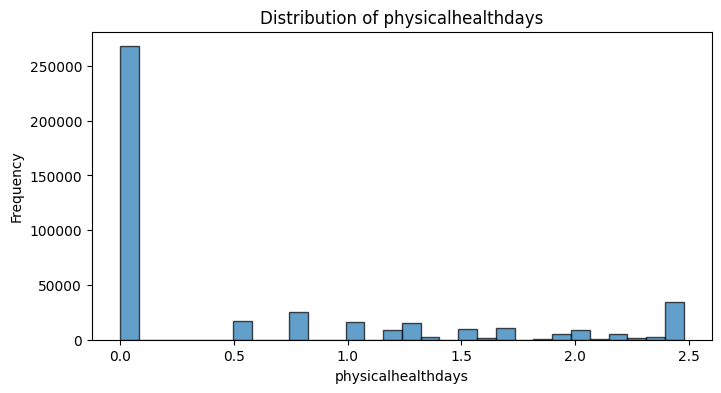

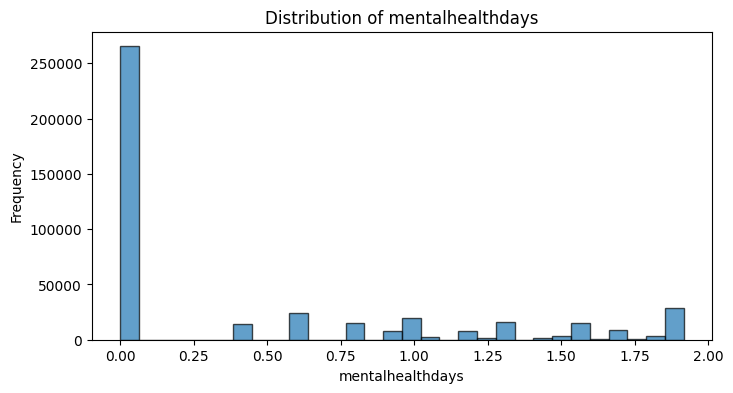

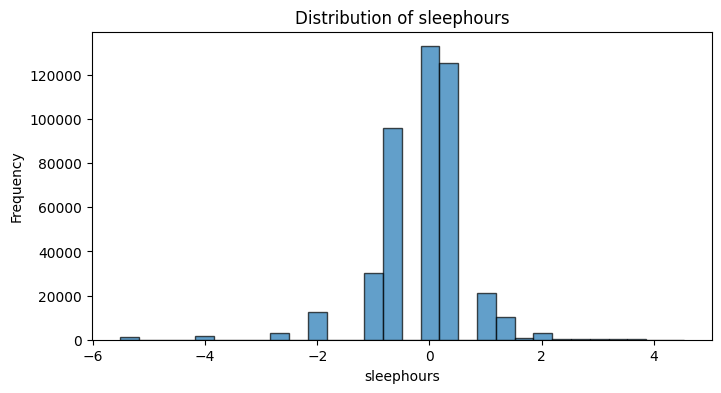

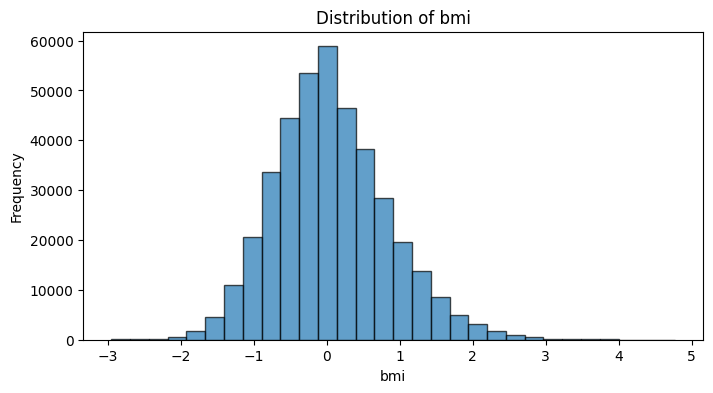

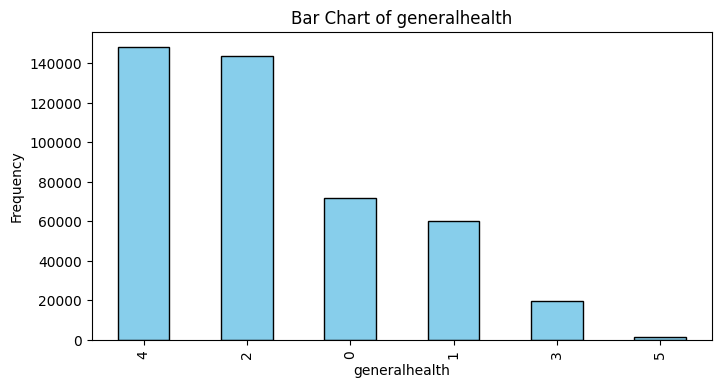

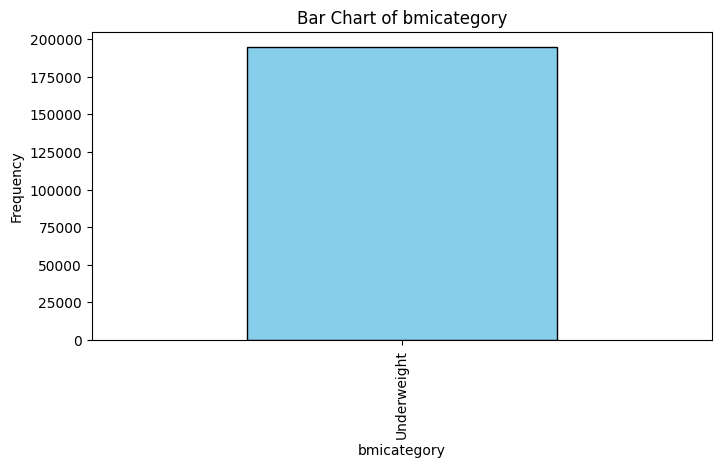

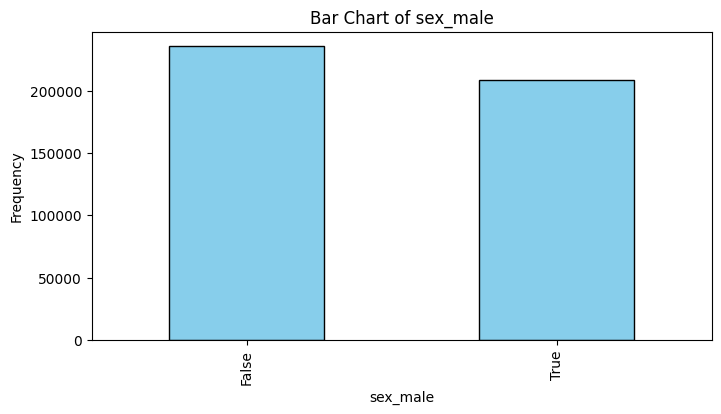

In [2]:
import matplotlib.pyplot as plt

# Univariate Analysis - Numerical Features
numerical_features = ['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.hist(heart_data[feature].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Univariate Analysis - Categorical Features
categorical_features = ['generalhealth', 'bmicategory', 'sex_male']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    heart_data[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title(f'Bar Chart of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    # Univariate Analysis - Numerical Features
numerical_features = ['physicalhealthdays', 'mentalhealthdays', 'sleephours', 'bmi']